# **Projeto**
---

Anderson Venancio</br>
Caio Dommarco Pedrão</br>
Vinicius Bispo Torres</br>

## Consistirá na:

> 1) **Limpeza dos dados, se necessária.**
>
> 2) **Verificação de dados *missing* e ou duplicados.**
>
> 3) **Análise exploratória dos dados a fim de conhecê-los melhor e obter *insights*.**
>
> 4) **Definição e construção do modelo de *machine learning* adequado para resolução do problema.**
>
> 5) **Avaliação do modelo por meio das principais métricas.**
>
> 6) **Apresentação dos resultados na data final.**

E-mail:

damodarabarbosa@gmail.com

<h3>Código do Projeto:</h3>

Case: Base de dados de cobrança, o objetivo é descobrir quais os melhores clientes para se efetuar a cobrança de dívidas. 

Dicionário:

<table>
<tr><td><b>Coluna</b></td><td><b>Descrição</b></td><tr>
<tr><td>CODIGO</td><td>Código da dívida</td><tr>
<tr><td>CD_BANCO</td><td>Código do banco</td><tr>
<tr><td>VALOR</td><td>Valor do empréstimo</td><tr>
<tr><td>DIAS_PRIMEIRA_PARCELA</td><td>Tempo para pagamento da primeira parcela</td><tr>
<tr><td>TIPO_CLIENTE</td><td>Classificação do cliente</td><tr>
<tr><td>CD_SEXO</td><td>Sexo do cliente</td><tr>
<tr><td>QTDE_DIVIDAS_ANTERIORES</td><td>Quantidade de outras dívidas</td><tr>
<tr><td>CD_CARTEIRA_CLIENTE</td><td>Carteira que o cliente pertence (A a G)</td><tr>
<tr><td>IDADE</td><td>Idade do cliente</td><tr>
<tr><td>GRUPO_IDADE_CONTA</td><td>Faixa de idade de conta corrente</td><tr>
<tr><td>EFETUOU_PAGAMENTO</td><td>Indica se o pagamento ocorreu em até 45 dias do vencimento</td><tr>
</table>



In [571]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from warnings 
scaler = MinMaxScaler()

SyntaxError: invalid syntax (390333923.py, line 7)

In [ ]:
# Lendo a base e tratando conforme necessario
df_base = pd.read_csv('BASE_ORIGINAL.txt')
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODIGO                   10000 non-null  int64  
 1   CD_BANCO                 10000 non-null  object 
 2   VALOR                    10000 non-null  float64
 3   DIAS_PRIMEIRA_PARCELA    10000 non-null  int64  
 4   TIPO_CLIENTE             10000 non-null  object 
 5   CD_SEXO                  10000 non-null  object 
 6   QTDE_DIVIDAS_ANTERIORES  10000 non-null  int64  
 7   CD_CARTEIRA_CLIENTE      10000 non-null  object 
 8   IDADE                    9276 non-null   float64
 9   GRUPO_IDADE_CONTA        10000 non-null  object 
 10  EFETUOU_PAGAMENTO        10000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_base[df_base.columns[1:10]],
                                                                    df_base['EFETUOU_PAGAMENTO'],
                                                                    test_size=0.25,
                                                                    random_state=42)

#Realizando cópia do X_test para o deploy
base_teste = X_test.copy()

df = X_train.copy()
# Substituindo espacos em branco do sexo por NI (Nao informado)
df['CD_SEXO'].replace(' ', 'NI', inplace=True)

# Existem algumas idades nulas, optamos por usar a media de idade pois a media e mediana da base estao proximas, e o unico campo nulo e perderiamos cerca de 10% da base se nao usarmos
df['IDADE'].fillna(np.mean(df['IDADE']), inplace=True)

# O campo que indica o pagamento esta como S ou N, trocaremos para 1 ou 0 para usarmos no modelo e facilitar na analise exploratoria, 1 para pagou e 0 para não pagou
y_train = pd.get_dummies(y_train, dtype=int, drop_first=True)
df['ALVO_1_0'] = y_train.copy()

C:\Users\F0734412\AppData\Local\Temp\ipykernel_14516\2785224409.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax.legend(list(df.groupby('CD_BANCO')['CD_BANCO'].agg(['count'])), list(df['CD_BANCO'].unique()))


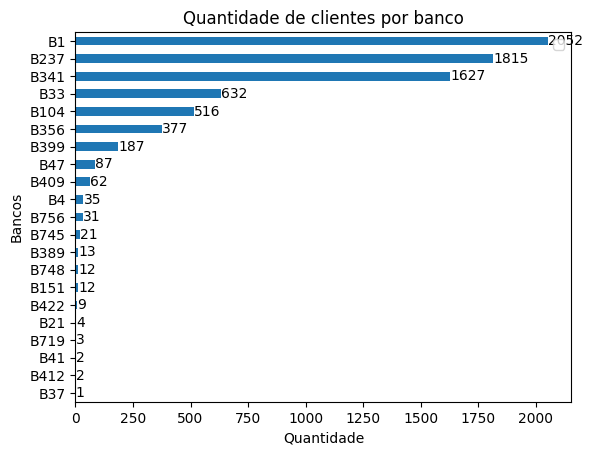

In [ ]:
ax = df.groupby('CD_BANCO')['CD_BANCO'].agg(['count']).sort_values(by='count').plot(kind = 'barh', 
                                                               title='Quantidade de clientes por banco')                                       
ax.set_xlabel("Quantidade")
ax.set_ylabel("Bancos")
# ax.legend(list(df['CD_BANCO'].unique()))
ax.legend(list(df.groupby('CD_BANCO')['CD_BANCO'].agg(['count'])), list(df['CD_BANCO'].unique()))

for container in ax.containers: # determina um rótulo para cada barra.
    ax.bar_label(container, label_type='edge')   

In [ ]:
print(df['VALOR'].describe())

faixas = np.arange(0, 1501, 250)
df['faixa_valor'] = pd.cut(df['VALOR'], faixas)

df_agrupado = df.groupby('faixa_valor')['faixa_valor'].agg(['count'])
df_agrupado

count    7500.000000
mean      382.871776
std       439.371917
min        20.850000
25%       119.945000
50%       240.420000
75%       483.000000
max      5586.650000
Name: VALOR, dtype: float64


count
faixa_valor        
(0, 250]       3870
(250, 500]     1967
(500, 750]      728
(750, 1000]     442
(1000, 1250]    167
(1250, 1500]    128

In [ ]:
print(df['DIAS_PRIMEIRA_PARCELA'].describe())

faixas = np.arange(0, 180, 14)
df['faixa_dias_primeira_parcela'] = pd.cut(df['DIAS_PRIMEIRA_PARCELA'], faixas)

df_agrupado = df.groupby('faixa_dias_primeira_parcela')[['faixa_dias_primeira_parcela']].agg(['count'])
df_agrupado

count    7500.000000
mean       22.820000
std        11.834813
min         1.000000
25%        15.000000
50%        21.000000
75%        27.000000
max       159.000000
Name: DIAS_PRIMEIRA_PARCELA, dtype: float64


faixa_dias_primeira_parcela
                                                  count
faixa_dias_primeira_parcela                            
(0, 14]                                            1659
(14, 28]                                           4242
(28, 42]                                           1169
(42, 56]                                            297
(56, 70]                                             83
(70, 84]                                             20
(84, 98]                                             16
(98, 112]                                             2
(112, 126]                                            9
(126, 140]                                            1
(140, 154]                                            1
(154, 168]                                            1

In [ ]:
print(df['TIPO_CLIENTE'].describe())

df_agrupado = df.groupby('TIPO_CLIENTE')[['ALVO_1_0']].agg(['count', 'sum'])
df_agrupado['percentual_pagantes'] = df_agrupado['ALVO_1_0']['sum'] / df_agrupado['ALVO_1_0']['count'] * 100
df_agrupado

count     7500
unique       4
top       NOVO
freq      2704
Name: TIPO_CLIENTE, dtype: object


ALVO_1_0       percentual_pagantes
                count   sum                    
TIPO_CLIENTE                                   
EXPERIENTE       1734  1151           66.378316
NEUTRO           1730   915           52.890173
NOVO             2704  1020           37.721893
VIP              1332   951           71.396396

In [ ]:
print(df['CD_SEXO'].describe())

df_agrupado = df.groupby('CD_SEXO')[['ALVO_1_0']].agg(['count', 'sum'])
df_agrupado['percentual_pagantes'] = df_agrupado['ALVO_1_0']['sum'] / df_agrupado['ALVO_1_0']['count'] * 100
df_agrupado

count     7500
unique       4
top          F
freq      3511
Name: CD_SEXO, dtype: object


ALVO_1_0       percentual_pagantes
           count   sum                    
CD_SEXO                                   
F           3511  2022           57.590430
I            103    54           52.427184
M           3204  1567           48.907615
NI           682   394           57.771261

In [ ]:
print(df['QTDE_DIVIDAS_ANTERIORES'].describe())

faixas = np.arange(-1, 22, 5)
df['faixa_qtd_dividas_anteriores'] = pd.cut(df['QTDE_DIVIDAS_ANTERIORES'], faixas)

df_agrupado = df.groupby('faixa_qtd_dividas_anteriores')[['ALVO_1_0']].agg(['count', 'sum'])
df_agrupado['percentual_pagantes'] = df_agrupado['ALVO_1_0']['sum'] / df_agrupado['ALVO_1_0']['count'] * 100
df_agrupado

count    7500.000000
mean        5.608267
std         6.273972
min         0.000000
25%         0.000000
50%         3.000000
75%        12.000000
max        16.000000
Name: QTDE_DIVIDAS_ANTERIORES, dtype: float64


ALVO_1_0       percentual_pagantes
                                count   sum                    
faixa_qtd_dividas_anteriores                                   
(-1, 4]                          4257  3032           71.223867
(4, 9]                           1083   432           39.889197
(9, 14]                           727   278           38.239340
(14, 19]                         1433   295           20.586183

In [ ]:
print(df['CD_CARTEIRA_CLIENTE'].describe())

df_agrupado = df.groupby('CD_CARTEIRA_CLIENTE')[['ALVO_1_0']].agg(['count', 'sum'])
df_agrupado['percentual_pagantes'] = df_agrupado['ALVO_1_0']['sum'] / df_agrupado['ALVO_1_0']['count'] * 100
df_agrupado

count     7500
unique       7
top          D
freq      1793
Name: CD_CARTEIRA_CLIENTE, dtype: object


ALVO_1_0       percentual_pagantes
                       count   sum                    
CD_CARTEIRA_CLIENTE                                   
A                        190    54           28.421053
B                        403   395           98.014888
C                        665   278           41.804511
D                       1793  1103           61.517011
E                       1319   723           54.814253
F                       1474   795           53.934871
G                       1656   689           41.606280

In [ ]:
print(df['IDADE'].describe())
df['IDADE'].fillna(np.mean(df['IDADE']))

faixas = np.arange(10, 121, 10)
# df['faixa_etaria'] = pd.cut(df['IDADE'], faixas)

lista = list(pd.cut(df['IDADE'], faixas, labels=False, retbins=True)[0])
df['faixa_etaria'] = [str((x+1) * 10) + '_' + str((x+2) * 10) if x <= 4 else '>60' for x in lista]

df_agrupado = df.groupby('faixa_etaria')[['ALVO_1_0']].agg(['count', 'sum'])
df_agrupado['percentual_pagantes'] = df_agrupado['ALVO_1_0']['sum'] / df_agrupado['ALVO_1_0']['count'] * 100
df_agrupado

count    7500.000000
mean       39.870190
std        11.385138
min        18.000000
25%        32.000000
50%        39.000000
75%        47.000000
max       112.000000
Name: IDADE, dtype: float64


ALVO_1_0       percentual_pagantes
                count   sum                    
faixa_etaria                                   
10_20              83    45           54.216867
20_30            1495   768           51.371237
30_40            2983  1475           49.446866
40_50            1644   916           55.717762
50_60             898   572           63.697105
>60               397   261           65.743073

In [ ]:
print(df['GRUPO_IDADE_CONTA'].describe())

df_agrupado = df.groupby('GRUPO_IDADE_CONTA')[['ALVO_1_0']].agg(['count', 'sum'])
df_agrupado['percentual_pagantes'] = df_agrupado['ALVO_1_0']['sum'] / df_agrupado['ALVO_1_0']['count'] * 100
df_agrupado

count                 7500
unique                   6
top       ENTRE 1 E 2 ANOS
freq                  1919
Name: GRUPO_IDADE_CONTA, dtype: object


ALVO_1_0       percentual_pagantes
                       count   sum                    
GRUPO_IDADE_CONTA                                     
ATÉ 1 ANO                390    86           22.051282
ENTRE 1 E 2 ANOS        1919   834           43.460135
ENTRE 2 E 4 ANOS         997   530           53.159478
ENTRE 4 E 9 ANOS        1724  1028           59.628770
ENTRE 9 E 14 ANOS       1427   844           59.145060
MAIOR OU IGUAL A 15     1043   715           68.552253

* Insights iniciais: Clientes mais velhos e com mais tempo de banco pagaram mais.
* O grupo de clientes categoria B demonstrou apresentou um percentual de pagantes acima do padrão, enquanto o A, são os que menos pagam, o que deve indicar que não há ordem de grandeza nestas carteiras, sendo apenas categorias.
* Quanto menor a quantidade de dívidas anteriores, maior o percentual de pagantes em pagar
* Embora tenhamos sexo como indefinido e não informado, as mulheres apresentam maior percentual dos que pagaram, sendo os indefinidos e não informados na mesma proporção que as mulheres
* Clientes VIP, seguido dos Experientes são os melhores pagadores.
* Aparentemente, as dívidas com até 30 dias apresentam a maior chance de serem pagas (na faixa de valores computamos até 36)
* Dívidas menores também são pagas com maior frequência
* Existem concentrações em algumas instituições financeiras, talvez devessemos gerar dummies para as maiores e agrupar as menores

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 4901 to 7270
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   CD_BANCO                      7500 non-null   object  
 1   VALOR                         7500 non-null   float64 
 2   DIAS_PRIMEIRA_PARCELA         7500 non-null   int64   
 3   TIPO_CLIENTE                  7500 non-null   object  
 4   CD_SEXO                       7500 non-null   object  
 5   QTDE_DIVIDAS_ANTERIORES       7500 non-null   int64   
 6   CD_CARTEIRA_CLIENTE           7500 non-null   object  
 7   IDADE                         7500 non-null   float64 
 8   GRUPO_IDADE_CONTA             7500 non-null   object  
 9   ALVO_1_0                      7500 non-null   int32   
 10  faixa_valor                   7302 non-null   category
 11  faixa_dias_primeira_parcela   7500 non-null   category
 12  faixa_qtd_dividas_anteriores  7500 non-null   cate

In [ ]:
def tratar_dataset_para_modelagem(df):

    #Tratando dados para o modelo:

    # Substituindo espacos em branco do sexo por NI (Nao informado)
    df['CD_SEXO'].replace(' ', 'NI', inplace=True)

    # Existem algumas idades nulas, optamos por usar a media de idade pois a media e mediana da base estao proximas, e o unico campo nulo e perderiamos cerca de 10% da base se nao usarmos
    df['IDADE'].fillna(np.mean(df['IDADE']), inplace=True)

    #Agrupando os bancos que nao fazem parte dos 5 maiores como B_OUTROS devido a baixa quantidade de registros
    df['CD_BANCO'] = [x if x in ['B1', 'B237', 'B341', 'B33', 'B104'] else 'B_OUTROS' for x in df['CD_BANCO']]

    # Normalizando dados do valor da dívida e idade
    modelo = scaler.fit(df[['VALOR', 'IDADE', 'DIAS_PRIMEIRA_PARCELA', 'QTDE_DIVIDAS_ANTERIORES']])
    df[['VALOR', 'IDADE', 'DIAS_PRIMEIRA_PARCELA', 'QTDE_DIVIDAS_ANTERIORES']] = modelo.transform(df[['VALOR', 'IDADE', 'DIAS_PRIMEIRA_PARCELA', 'QTDE_DIVIDAS_ANTERIORES']])

    df['GRUPO_IDADE_CONTA'] = [x.replace(' ', '_') for x in df['GRUPO_IDADE_CONTA']]

    # Gerando dummies para dados categóricos
    d_banco = pd.get_dummies(df['CD_BANCO'], dtype=int, prefix = 'CD_BANCO', prefix_sep='_')
    d_tp_cli = pd.get_dummies(df['TIPO_CLIENTE'], dtype=int, prefix = 'TP_CLI', prefix_sep='_')
    d_sexo = pd.get_dummies(df['CD_SEXO'], dtype=int, prefix = 'SEXO', prefix_sep='_')
    d_tp_cart = pd.get_dummies(df['CD_CARTEIRA_CLIENTE'], dtype=int, prefix = 'TP_CART', prefix_sep='_')
    d_idd_ct = pd.get_dummies(df['GRUPO_IDADE_CONTA'], dtype=int, prefix = 'IDD_CT', prefix_sep='_')

    df.drop(columns=['CD_BANCO', 
                     'TIPO_CLIENTE', 
                     'CD_SEXO', 
                     'CD_CARTEIRA_CLIENTE', 
                     'GRUPO_IDADE_CONTA'], 
                     inplace=True)

    df = pd.concat([df, d_banco, d_tp_cli, d_sexo, d_tp_cart, d_idd_ct], axis=1)

    return df

In [ ]:
X_treino = tratar_dataset_para_modelagem(X_train)
X_teste = tratar_dataset_para_modelagem(X_test)

lr = linear_model.LinearRegression()
lr.fit(X_treino, y_train)

print(f'Intercepto (b0): {lr.intercept_}')
print(f'Coeficiente(s) (b1, ..., bn): {lr.coef_}\n')

y_pred_train = lr.predict(X_treino)

y_test = pd.get_dummies(y_test, dtype=int, drop_first=True)

y_pred = lr.predict(X_teste)

Intercepto (b0): [-8.93977698e+12]
Coeficiente(s) (b1, ..., bn): [[-1.79900737e-01 -5.87335896e-01 -4.54577913e-01  8.24525312e-02
   8.81365957e+12  8.81365957e+12  8.81365957e+12  8.81365957e+12
   8.81365957e+12  8.81365957e+12 -6.57273467e+12 -6.57273467e+12
  -6.57273467e+12 -6.57273467e+12  4.58924333e+12  4.58924333e+12
   4.58924333e+12  4.58924333e+12 -1.68500948e+12 -1.68500948e+12
  -1.68500948e+12 -1.68500948e+12 -1.68500948e+12 -1.68500948e+12
  -1.68500948e+12  3.79461823e+12  3.79461823e+12  3.79461823e+12
   3.79461823e+12  3.79461823e+12  3.79461823e+12]]



In [ ]:
print(f'Métricas de treino:\n')
print(f'R2 = {r2_score(y_train, y_pred_train):.8f}')
print(f'MAE = {mean_absolute_error(y_train, y_pred_train):.8f}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred_train)):.8f}\n')

print(f'Métricas de teste:\n')
print(f'R2 = {r2_score(y_test, y_pred):.8f}')
print(f'MAE = {mean_absolute_error(y_test, y_pred):.8f}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred)):.8f}\n')

Métricas de treino:

R2 = 0.29331389
MAE = 0.36066380
RMSE = 0.41909032

Métricas de teste:

R2 = 0.29102382
MAE = 0.36300781
RMSE = 0.41915536



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2

pf = PolynomialFeatures(degree=degree, include_bias=False)

X_train_pf = pf.fit_transform(X_treino)
X_test_pf = pf.transform(X_teste)

print('==' * 20)
print(f'Número de features de entrada: {pf.n_features_in_}')
print(f'Número outputs: {pf.n_output_features_}')
print('==' * 20)
# ====================================================================
# Ajuste do modelo:

lr.fit(X_train_pf, y_train)
# print(f"Intercepto (b0): {lr.intercept_}")
# print(f"Demais parâmetros (b1, ..., bn): {lr.coef_}\n\n")

# ====================================================================
# Predições e métricas:

y_pred_train = lr.predict(X_train_pf)
y_pred = lr.predict(X_test_pf)

print('Métricas de treino:')
print(f'R2 = {r2_score(y_train, y_pred_train)}')
print(f'MAE = {mean_absolute_error(y_train, y_pred_train)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred_train))}\n')

print('Métricas de teste:')
print(f'R2 = {r2_score(y_test, y_pred)}')
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}\n')

Número de features de entrada: 31
Número outputs: 527


Métricas de treino:
R2 = 0.3577891841072657
MAE = 0.3287326171875
RMSE = 0.39951506907020967

Métricas de teste:
R2 = 0.286709526019274
MAE = 0.3469330078125
RMSE = 0.42042875873023955



Matriz de confusão do teste


c:\Users\F0734412\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


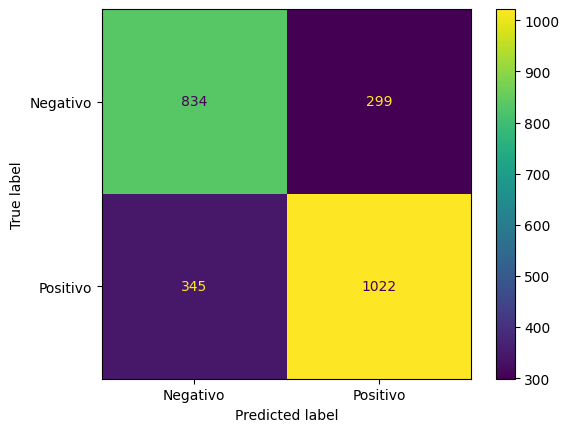


Matriz de confusão do treino


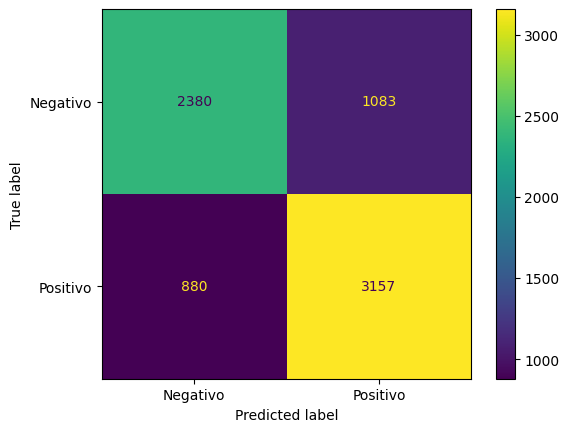


AUC Score para o teste
0.8223663184210339

AUC Score para o treino
0.8195051248089162

Métricas de classificação - Teste
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1133
           1       0.77      0.75      0.76      1367

    accuracy                           0.74      2500
   macro avg       0.74      0.74      0.74      2500
weighted avg       0.74      0.74      0.74      2500


Métricas de classificação - Treino
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      3463
           1       0.74      0.78      0.76      4037

    accuracy                           0.74      7500
   macro avg       0.74      0.73      0.74      7500
weighted avg       0.74      0.74      0.74      7500



In [ ]:
# Regressão logística com dados de treinamento
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

LogisticReg = LogisticRegression()
LogisticReg.fit(X_treino, y_train)

# Regressão Logística
y_pred_train_prob = LogisticReg.predict_proba(X_treino)
y_pred_prob  = LogisticReg.predict_proba(X_teste)

y_pred_train = [1 if x > 0.50 else 0 for x in y_pred_train_prob[:,1]]
y_pred = [1 if x > 0.50 else 0 for x in y_pred_prob[:,1]]

# matriz de confusao
print('Matriz de confusão do teste')
cfs_mtx = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(cfs_mtx, display_labels=['Negativo', 'Positivo'])
display.plot(cmap='viridis', values_format='.0f')
plt.show()

print('\nMatriz de confusão do treino')
cfs_mtx = confusion_matrix(y_train, y_pred_train)
display = ConfusionMatrixDisplay(cfs_mtx, display_labels=['Negativo', 'Positivo'])
display.plot(cmap='viridis', values_format='.0f')
plt.show()

print('\nAUC Score para o teste')
print(roc_auc_score(y_test, y_pred_prob[:,1]))

print('\nAUC Score para o treino')
print(roc_auc_score(y_train, y_pred_train_prob[:,1]))

# outras metricas
print('\nMétricas de classificação - Teste')
print(classification_report(y_test, y_pred))

# outras metricas
print('\nMétricas de classificação - Treino')
print(classification_report(y_train, y_pred_train))


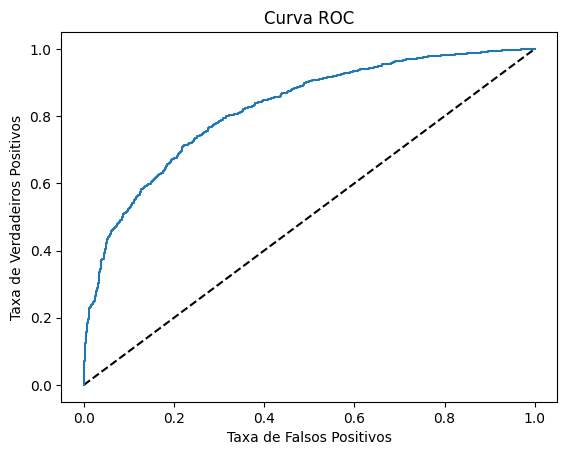

In [ ]:


# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
# # Coordenadas do ponto
# x = fpr # Taxa de Falsos Positivos (TFP)
# y = tpr # Taxa de Verdadeiros Positivos (TVP)
# # Adicionando o ponto ao gráfico
# plt.scatter(x, y)

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

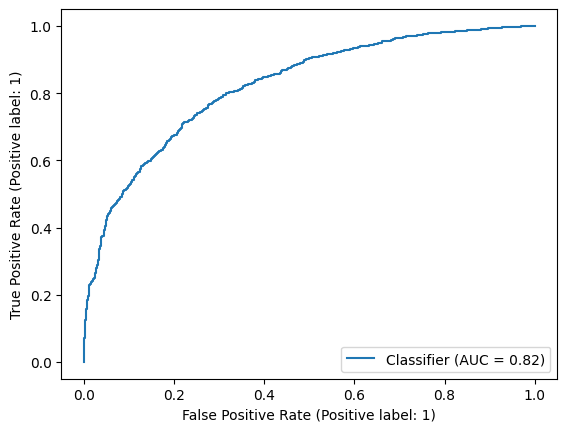

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_prob[:,1])
plt.show([0, 1], [0, 1])
plt.show()

In [ ]:
# Gerando a equação para um score de 0 a 100

equacao = ''

for i in range(len(X_teste.columns)):

    if i == 0:
        equacao = '1/(1 + exp(-(' + str(LogisticReg.intercept_[0])

    coluna = X_teste.columns[i]
    peso = LogisticReg.coef_[0][i]
    equacao += '\n + ' + coluna + ' * ' + str(peso)

equacao += '))) * 100'
print(equacao)


1/(1 + exp(-(1.6778110689605699
 + VALOR * -0.958628957248579
 + DIAS_PRIMEIRA_PARCELA * -2.9890663731825815
 + QTDE_DIVIDAS_ANTERIORES * -2.3020323210339426
 + IDADE * 0.3493782693386751
 + CD_BANCO_B1 * 0.3439173404494744
 + CD_BANCO_B104 * 0.3459842720378986
 + CD_BANCO_B237 * -0.04954229554398327
 + CD_BANCO_B33 * -0.18427996513726802
 + CD_BANCO_B341 * -0.5988091204303985
 + CD_BANCO_B_OUTROS * 0.14397136825930695
 + TP_CLI_EXPERIENTE * 0.21793344907163442
 + TP_CLI_NEUTRO * -0.16519826509230515
 + TP_CLI_NOVO * -0.5004852928034624
 + TP_CLI_VIP * 0.4489917084591818
 + SEXO_F * 0.07631456166387426
 + SEXO_I * -0.19082629286434738
 + SEXO_M * -0.19785659538416261
 + SEXO_NI * 0.31360992621968037
 + TP_CART_A * -0.9763288292224467
 + TP_CART_B * 3.0035904921985583
 + TP_CART_C * -0.8718253773531252
 + TP_CART_D * -0.11661685186877611
 + TP_CART_E * -0.23758548611103383
 + TP_CART_F * -0.2497427829705736
 + TP_CART_G * -0.5502495650374842
 + IDD_CT_ATÉ_1_ANO * -0.767357507916817
 + I

In [ ]:
import math


def calcular_score(linha):
# for linha in X_teste.itertuples(index=False):
    score = LogisticReg.intercept_[0]

    for i in range(len(linha)):
        score += linha[i] * LogisticReg.coef_[0][i]

    score = 1 / (1 + math.exp((-1 * score))) * 100

    return int(score)

base_teste['Score'] = X_teste.apply(calcular_score, axis=1)
base_teste['Predicao'] = y_pred
base_teste['Resultado_Real'] = y_test



In [ ]:
base_teste

CD_BANCO    VALOR  DIAS_PRIMEIRA_PARCELA TIPO_CLIENTE CD_SEXO   
6252     B104   428.00                     18         NOVO       F  \
4684     B237   165.00                     20   EXPERIENTE       M   
1731       B1   200.00                     14       NEUTRO       M   
4742     B104    74.00                     10          VIP       M   
4521     B341   250.00                     17   EXPERIENTE       M   
...       ...      ...                    ...          ...     ...   
4862     B341   137.50                     15       NEUTRO       M   
7025     B341   348.91                     17          VIP           
7647       B1   200.00                     23         NOVO       F   
7161     B356   210.48                      8         NOVO       M   
73         B1  2000.00                     39   EXPERIENTE       M   

      QTDE_DIVIDAS_ANTERIORES CD_CARTEIRA_CLIENTE  IDADE    GRUPO_IDADE_CONTA   
6252                       16                   G   36.0     ENTRE 1 E 2 ANOS  \
4684                        0                   D   62.0     ENTRE 1 E 2 ANOS   
1731                        5                   G   40.0  MAIOR OU IGUAL A 15   
4742                        0                   D   45.0     ENTRE 4 E 9 ANOS   
4521                        0                   G    NaN     ENTRE 2 E 4 ANOS   
...                       ...                 ...    ...                  ...   
4862                        0                   D   37.0    ENTRE 9 E 14 ANOS   
7025                       16                   E   32.0     ENTRE 1 E 2 ANOS   
7647                       16                   F   21.0     ENTRE 4 E 9 ANOS   
7161                        0                   G   27.0     ENTRE 1 E 2 ANOS   
73                          8                   C   37.0     ENTRE 2 E 4 ANOS   

      Score  Predicao  Resultado_Real  
6252     14         0               0  
4684     75         1               1  
1731     59         1               1  
4742     90         1               1  
4521     55         1               1  
...     ...       ...             ...  
4862     61         1               1  
7025     23         0               0  
7647     21         0               0  
7161     58         1               0  
73       21         0               0  

[2500 rows x 12 columns]